<a href="https://colab.research.google.com/github/asafdari-boop/ComputationalPhyiscsLibrary/blob/main/PDE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boundary value problems and the relaxation method

### Solution of Laplace's equation

$\frac{\partial^2 \phi}{\partial x^2} +  \frac{\partial^2 \phi}{\partial y^2} = 0$

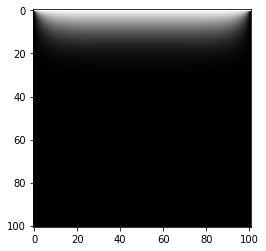

In [ ]:
from numpy import empty,zeros,max
from pylab import imshow,gray,show

# Constants
M = 100         # Grid squares on a side
V = 1.0         # Voltage at top wall
target = 1e-3   # Target accuracy

# use two arrays to store the potential values
def Laplace():
    phi = zeros([M+1, M+1], float)
    phi[0,:] = V
    phiprime = zeros([M+1, M+1], float)

    # Main loop
    delta = 1.0

    while delta > target:
        # Calculate new values of the potential
        for i in range(M+1):
            for j in range(M+1):
                if i==0 or i==M or j==0 or j==M:
                    phiprime[i,j] = phi[i,j]
                else:
                    phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4

        # Calculate maximum difference from old values
        delta = max(abs(phi - phiprime))

        # Swap the two arrays around
        phi,phiprime = phiprime, phi

    # Make a plot
    imshow(phi)
    gray()
    show()

if __name__=="__main__":
    Laplace()

### Solution of the Poisson equation

$\frac{\partial^2 \phi}{\partial x^2} +  \frac{\partial^2 \phi}{\partial y^2} = -\frac{\rho}{\epsilon_0}$

Three methods considered: (1) normal relaxation method; (2) Gauss-Seidel method without the overrelaxation; (3) Guass-Seidel method with the overrelaxation. 

For the normal relaxation method:
# of steps used:  1122
Time used:  20.088252315999995


For the Gauss-Siedel method without overrelation:
# of steps used:  819
Time used:  19.296035963999998


For the Gauss-Siedel method with overrelation:
# of steps used:  141
Time used:  3.810246320999994


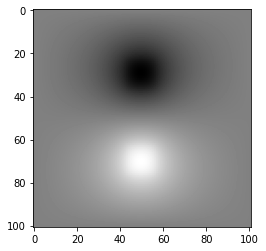

In [ ]:
from numpy import empty,zeros,max
from pylab import imshow,gray,show
import timeit

# Constants
M = 100 # Grid squares on a side
target = 1e-2 # Target accuracy
rho0 = 1 # Charge density (C/m**2)
leng = 14 # Length of square charge (cm)
pX, pY= 70 , 50 # Positive charge center coord
nX, nY = 30 , 50 # Negative charge center coord

# creat arrays to hold potential values
phi = zeros([M+1,M+1] , float)
phiprime = empty ([M+1,M+1], float)

# Create array to hold values of charge density
rho = zeros([M+1,M+1] , float)
rho[pX-int(leng/2):pX+int(leng/2), pY-int(leng/2):pY+int(leng/2)] = rho0
rho[nX-int(leng/2):nX+int(leng/2), nY-int(leng/2):nY+int(leng/2)] = -rho0

# normal relaxation method for the Poisson problem
def Poisson(phi, phiprime, M, target):
    # creat arrays to hold potential values
    phi = zeros([M+1,M+1] , float)
    phiprime = empty ([M+1,M+1], float)

    # Main loop
    delta = 1.0
    steps = 0

    start = timeit.default_timer()
    while delta > target:
        # Calculate new values of the potential
        for i in range (M+1):
            for j in range(M+1):
                if i==0 or i==M or j==0 or j==M:
                    phiprime[i, j] = phi[i, j]
                else:
                    phiprime[i, j] = (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1])/4 + rho[i, j]/4

        # Calculate maximum difference from old values
        delta = max(abs(phi - phiprime))

        # Swap the two arrays around
        phi, phiprime = phiprime, phi

        steps += 1

    end = timeit.default_timer()
    print("# of steps used: ", steps)
    print("Time used: ", end-start)
    return phi

# Gauss-Seidal and overrelaxation method for the Poisson problem
def Poisson_GS_Overrelaxation(phi, M, overrelaxation, target):
    # creat arrays to hold potential values
    phi = zeros([M+1,M+1] , float)
    phiprime = empty ([M+1,M+1], float)

    # Main loop
    delta = 1.0
    steps = 0

    omega = 0.  # overrelaxation parameter
    if overrelaxation: 
        omega = 0.9  

    start = timeit.default_timer()
    while delta > target:
        diff_max = 0.
        # Calculate new values of the potential and update delta
        for i in range (M+1):
            for j in range(M+1):
                if i==0 or i==M or j==0 or j==M:
                    phi[i, j] = phi[i, j]
                else:
                    phitmp = phi[i, j]
                    if overrelaxation == 0:
                        # Gauss-Sidel
                        phi[i, j] = (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1])/4 + rho[i, j]/4  
                    else:
                        # Gauss-Sidel plus overrelaxation
                        phi[i, j] = (1+omega)*(phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1])/4 - omega * phi[i, j]+ rho[i, j]/4
                    diff = abs(phi[i, j] - phitmp)
                    if(diff > diff_max):
                        diff_max = diff
        steps += 1
        delta = diff_max

    end = timeit.default_timer()
    print("# of steps used: ", steps)
    print("Time used: ", end-start)
    return phi

# normal relaxation method
print("For the normal relaxation method:")
phi_final = Poisson(phi, phiprime, M, target)
print("\n")

# Gauss-Siedel with and without overrelaxation
print("For the Gauss-Siedel method without overrelation:")
phi_final = Poisson_GS_Overrelaxation(phi, M, 0, target)
print("\n")

print("For the Gauss-Siedel method with overrelation:")
phi_final = Poisson_GS_Overrelaxation(phi, M, 1, target)

# Make plot 
imshow(phi_final)
gray()
show()

# Initial value problems and the FTCS method

Heat equation:

$\frac{\partial \phi}{\partial t}= D \frac{\partial^2 \phi}{\partial x^2}$ and the initial condition at $t=0$

We have $\frac{\partial^2 \phi}{\partial x^2}=\frac{\phi(x+a, t)+\phi(x-a, t)-2\phi(x, t)}{a^2}$ and $\frac{\partial\phi}{\partial t}=\frac{D}{a^2} [\phi(x+a, t)+\phi(x-a, t)-2\phi(x, t)]$

using the Euler's method we have $\phi(t+h) = \phi(t) + hf(x, t)=\phi(t) + h\frac{D}{a^2} [\phi(x+a, t)+\phi(x-a, t)-2\phi(x, t)]$

The time it takes is:  1.6108810260000155


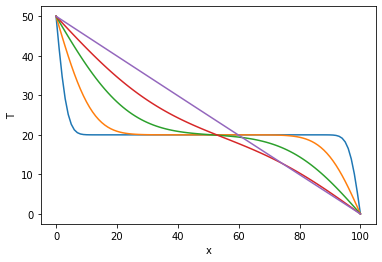

In [ ]:
from numpy import empty
from pylab import plot,xlabel,ylabel,show
import timeit

# Constants
L = 0.01      # Thickness of steel in meters
D = 4.25e-6   # Thermal diffusivity
N = 100       # Number of divisions in grid
a = L/N       # Grid spacing
h = 1e-4      # Time-step
epsilon = h/1000

Tlo = 0.0     # Low temperature in Celcius
Tmid = 20.0   # Intermediate temperature in Celcius
Thi = 50.0    # Hi temperature in Celcius

t1 = 0.01
t2 = 0.1
t3 = 0.4
t4 = 1.0
t5 = 10.0
tend = t5 + epsilon

# Create arrays
T = zeros(N+1, float)
T[0] = Thi
T[N] = Tlo
T[1:N] = Tmid
Tp = zeros(N+1, float)
Tp[0] = Thi
Tp[N] = Tlo

# Main loop
t = 0.0
c = h*D/(a*a)

start = timeit.default_timer()

while t < tend:
    # Calculate the new values of T
    #for i in range(1,N):
    #  Tp[i] = T[i] + c*(T[i+1]+T[i-1]-2*T[i])

    # or use one array to speed up the calculation
    Tp[1:N] = T[1:N] + c*(T[2:N+1] + T[0:N-1] - 2*T[1:N])

    T,Tp = Tp,T
    t += h

    # Make plots at the given times
    if abs(t-t1) < epsilon:
        plot(T)
    if abs(t-t2) < epsilon:
        plot(T)
    if abs(t-t3) < epsilon:
        plot(T)
    if abs(t-t4) < epsilon:
        plot(T)
    if abs(t-t5) < epsilon:
        plot(T)

end = timeit.default_timer()
duration = end - start
print("The time it takes is: ", duration)

xlabel("x")
ylabel("T")
show()